# TP0 GEOMECÁNICA DE LOS RESERVORIOS


## Comparison between Alluminum 6061 and Tight Sand Young's Modulus and Poisson's Ratio.

## Ferreyra, Marcos José (29554)

## Alluminum 6061:

RESULTADOS:
Young´s Modulus of Alluminum 6061 =  10305729.45 psi
The Poisson´s Ratio of Alluminum 6061 is =  0.36325


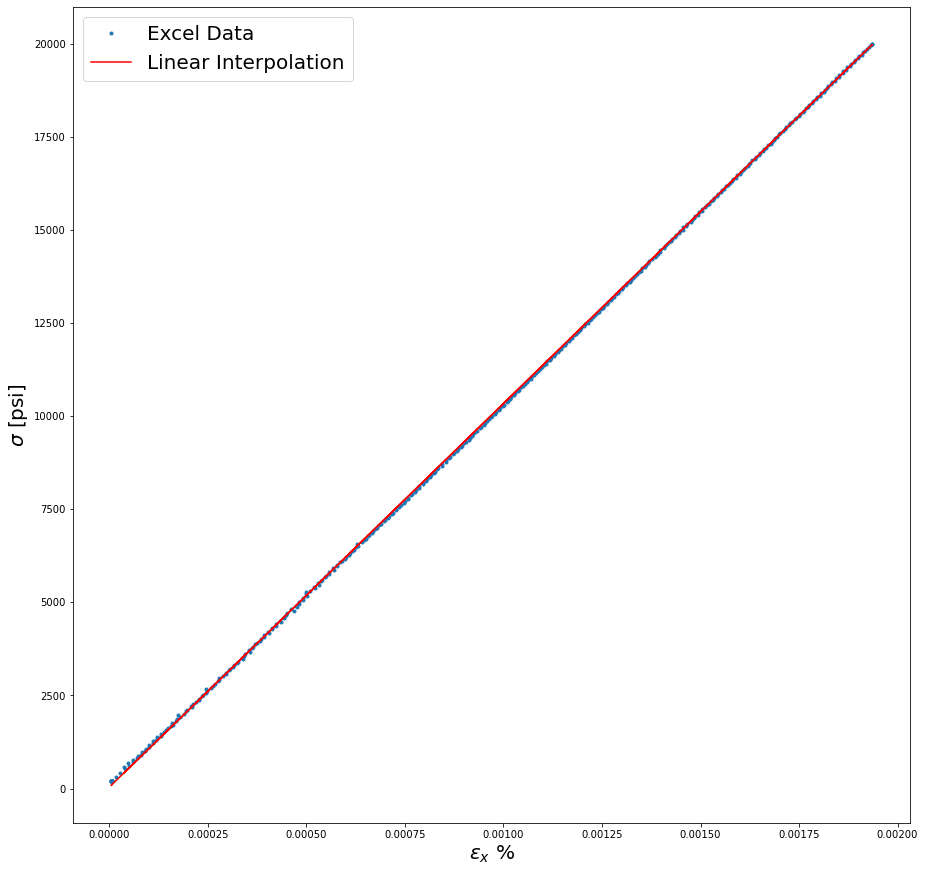

In [24]:
from openpyxl import *

#Datos de la probeta
d=2.5349; #Diámetro de la probeta en centímetros
l0=5.13588; #Longitud Inicial de la probeta en centímetros
pi=3.1415929;
A=pi*((d/2)**2); #Área de la probeta en cm^2

excel_file = load_workbook('Datos_Ej_1_Al_6061.xlsx') #Llamo al archivo de Excel y lo abro
activacion=excel_file.active

tension = []       #Creo las listas donde voy a introducir
deformation_x = [] #los datos del Excel
deformation_y =[]

worksheet=excel_file['TRX'] #Selecciono la hoja indicada
q_rows=worksheet.max_row    #Cantidad de filas de mi hoja 

#Leo los datos de las columnas (fila por fila) y los guardo en las listas creadas anteriormente
for t in range(2, q_rows+1):
    tensionvalue=worksheet.cell(row=t, column=3).value
    tension.append(tensionvalue)
    
for d_x in range(2, q_rows+1):
    def_x_value=worksheet.cell(row=d_x, column=4).value
    deformation_x.append(def_x_value)
    
for d_y in range(2, q_rows+1):
    def_y_value=worksheet.cell(row=d_y, column=5).value
    deformation_y.append(def_y_value)
    
    
#Deformaciones máximas
import numpy as np
deformation_x_max =np.max(deformation_x)
deformation_y_max =np.min(deformation_y)

#Poisson's Ratio
v =-deformation_y_max/deformation_x_max

#Rango en el cual haremos la interpolación, como va y vuelve la tensión y la deformación
#realizaré la interpolación desde el inicio del ensayo hasta el punto donde comienza a volver
#es decir, donde se ejerce la tensión máxima y su correspondiente deformación
max_pos_tension=np.argmax(tension)

#Interpolación de valores
polyorder = 1;
p=np.polyfit(deformation_x[0:max_pos_tension+1], tension[0:max_pos_tension+1], polyorder) 
#Curve Fitting with a Polynomial Function
# p are the coefficients of the poly, 
# p=np.polyfit(xdata, ydata, pOrder)

y_p = np.polyval(p, deformation_x)        # y_p = np.polyval(p, valores donde quiero evaluar el polinomio)

#Resultados 
print('RESULTADOS:')
print('Young´s Modulus of Alluminum 6061 = ', round(p[0],2),'psi')
print('The Poisson´s Ratio of Alluminum 6061 is = ', round(v, 5))


#Graficamos tensión deformación en x     
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.xlabel(r'$\varepsilon_x$ %', fontsize=20)
plt.ylabel(r'$\sigma$ [psi]', fontsize=20)
plt.plot(deformation_x,tension,'.')
plt.plot(deformation_x, y_p,'r')
plt.legend(['Excel Data','Linear Interpolation'], loc=2, prop={'size': 20})


## Tight Sand:

RESULTADOS:
Young´s Modulus of Tight Sand =  3832212.83 psi
The Poisson´s Ratio of Tight Sand is =  0.54189


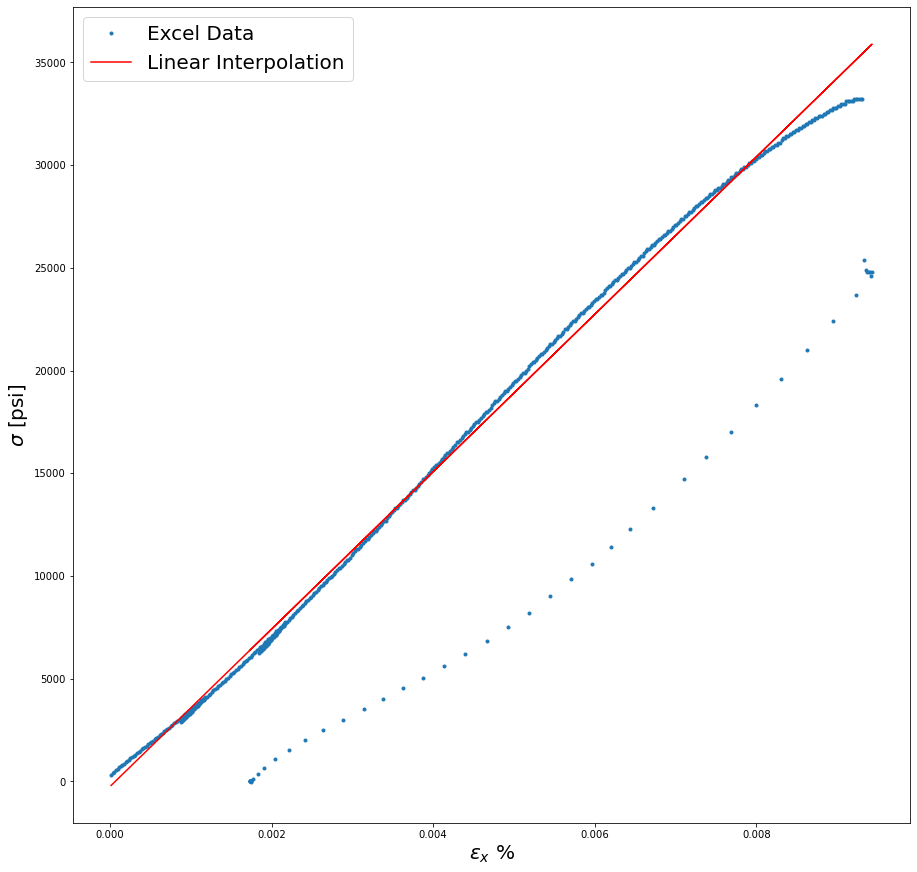

In [1]:
from openpyxl import *

#Datos de la probeta
d=2.5349; #Diámetro de la probeta en centímetros
l0=5.13588; #Longitud Inicial de la probeta en centímetros
pi=3.1415929;
A=pi*((d/2)**2); #Área de la probeta en cm^2

excel_file = load_workbook('Datos_Ej_1_arena_tight.xlsx') #Llamo al archivo de Excel y lo abro
activacion=excel_file.active

tension = []       #Creo las listas donde voy a introducir
deformation_x = [] #los datos del Excel
deformation_y =[]

worksheet=excel_file['TRX'] #Selecciono la hoja indicada
q_rows=worksheet.max_row    #Cantidad de filas de mi hoja 

#Leo los datos de las columnas (fila por fila) y los guardo en las listas creadas anteriormente
for t in range(2, q_rows+1):
    tensionvalue=worksheet.cell(row=t, column=3).value
    tension.append(tensionvalue)
    
for d_x in range(2, q_rows+1):
    def_x_value=worksheet.cell(row=d_x, column=4).value
    deformation_x.append(def_x_value)
    
for d_y in range(2, q_rows+1):
    def_y_value=worksheet.cell(row=d_y, column=5).value
    deformation_y.append(def_y_value)
    
    
#Deformaciones máximas
import numpy as np
deformation_x_max =np.max(deformation_x)
deformation_y_max =np.min(deformation_y)

#Poisson's Ratio
v =-deformation_y_max/deformation_x_max

#Rango en el cual haremos la interpolación, como va y vuelve la tensión y la deformación
#realizaré la interpolación desde el inicio del ensayo hasta el punto donde comienza a volver
#es decir, donde se ejerce la tensión máxima y su correspondiente deformación
max_pos_tension=np.argmax(tension)


#Interpolación de valores
polyorder = 1;
p=np.polyfit(deformation_x[0:max_pos_tension+1], tension[0:max_pos_tension+1], polyorder) #Curve Fitting with a Polynomial Function
                                                # p are the coefficients of the poly, 
                                                # p=np.polyfit(xdata, ydata, pOrder)
y_p = np.polyval(p, deformation_x)              # y_p = np.polyval(p, valores donde quiero evaluar el polinomio)

#Resultados 
print('RESULTADOS:')
print('Young´s Modulus of Tight Sand = ', round(p[0],2),'psi')
print('The Poisson´s Ratio of Tight Sand is = ', round(v, 5))


#Graficamos tensión deformación en x     
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.xlabel(r'$\varepsilon_x$ %', fontsize=20)
plt.ylabel(r'$\sigma$ [psi]', fontsize=20)
plt.plot(deformation_x,tension,'.')
plt.plot(deformation_x, y_p,'r')
plt.legend(['Excel Data','Linear Interpolation'], loc=2, prop={'size': 20})

## Ambas interpolacione en un mismo gráfico

RESULTADOS:
Young´s Modulus of Alluminum 6061 =  10305729.45 psi
The Poisson´s Ratio of Alluminum 6061 is =  0.36325
RESULTADOS:
Young´s Modulus of Sand Tight =  3832212.83 psi
The Poisson´s Ratio of Sand Tight is =  0.54189


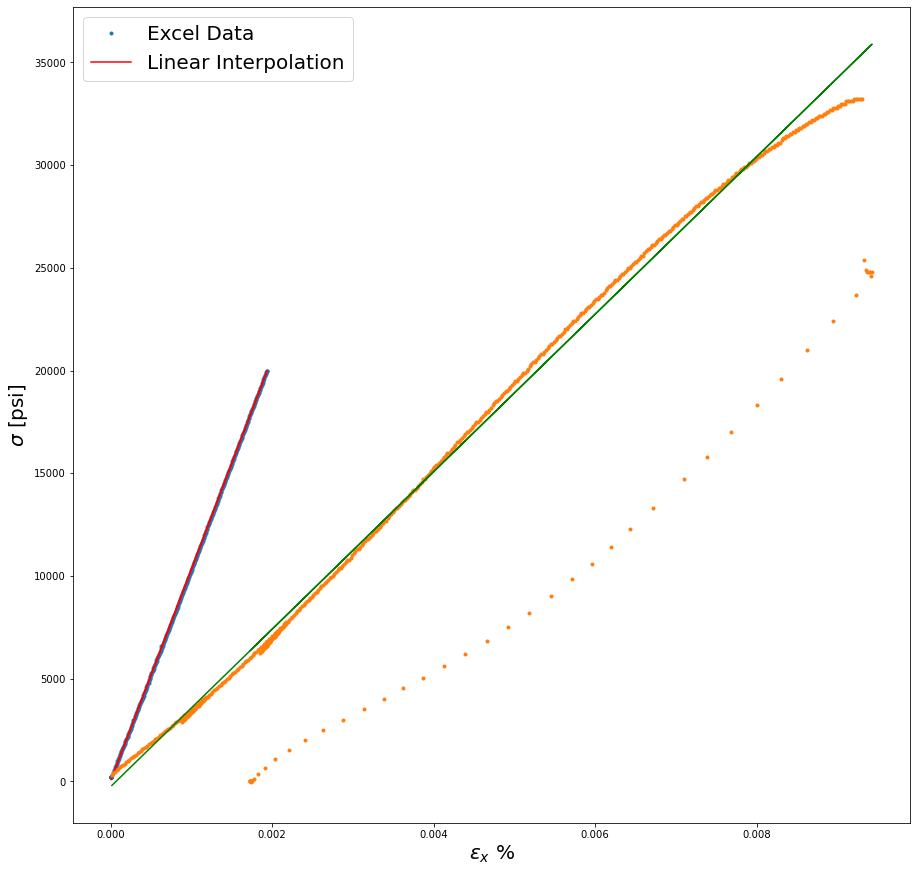

In [3]:
from openpyxl import *

#Datos de la probeta
d=2.5349; #Diámetro de la probeta en centímetros
l0=5.13588; #Longitud Inicial de la probeta en centímetros
pi=3.1415929;
A=pi*((d/2)**2); #Área de la probeta en cm^2

excel_file = load_workbook('Datos_Ej_1_Al_6061.xlsx') #Llamo al archivo de Excel y lo abro
activacion=excel_file.active

tension = []       #Creo las listas donde voy a introducir
deformation_x = [] #los datos del Excel
deformation_y =[]

worksheet=excel_file['TRX'] #Selecciono la hoja indicada
q_rows=worksheet.max_row    #Cantidad de filas de mi hoja 

#Leo los datos de las columnas (fila por fila) y los guardo en las listas creadas anteriormente
for t in range(2, q_rows+1):
    tensionvalue=worksheet.cell(row=t, column=3).value
    tension.append(tensionvalue)
    
for d_x in range(2, q_rows+1):
    def_x_value=worksheet.cell(row=d_x, column=4).value
    deformation_x.append(def_x_value)
    
for d_y in range(2, q_rows+1):
    def_y_value=worksheet.cell(row=d_y, column=5).value
    deformation_y.append(def_y_value)
    
    
#Deformaciones máximas
import numpy as np
deformation_x_max =np.max(deformation_x)
deformation_y_max =np.min(deformation_y)

#Poisson's Ratio
v =-deformation_y_max/deformation_x_max

#Rango en el cual haremos la interpolación, como va y vuelve la tensión y la deformación
#realizaré la interpolación desde el inicio del ensayo hasta el punto donde comienza a volver
#es decir, donde se ejerce la tensión máxima y su correspondiente deformación
max_pos_tension=np.argmax(tension)

#Interpolación de valores
polyorder = 1;
p=np.polyfit(deformation_x[0:max_pos_tension+1], tension[0:max_pos_tension+1], polyorder) 
#Curve Fitting with a Polynomial Function
# p are the coefficients of the poly, 
# p=np.polyfit(xdata, ydata, pOrder)

y_p = np.polyval(p, deformation_x)        # y_p = np.polyval(p, valores donde quiero evaluar el polinomio)

#Resultados 
print('RESULTADOS:')
print('Young´s Modulus of Alluminum 6061 = ', round(p[0],2),'psi')
print('The Poisson´s Ratio of Alluminum 6061 is = ', round(v, 5))


#Graficamos tensión deformación en x     
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.xlabel(r'$\varepsilon_x$ %', fontsize=20)
plt.ylabel(r'$\sigma$ [psi]', fontsize=20)
plt.plot(deformation_x,tension,'.')
plt.plot(deformation_x, y_p,'r')
plt.legend(['Excel Data','Linear Interpolation'], loc=2, prop={'size': 20})


#Datos de la probeta
d=2.5349; #Diámetro de la probeta en centímetros
l0=5.13588; #Longitud Inicial de la probeta en centímetros
pi=3.1415929;
A=pi*((d/2)**2); #Área de la probeta en cm^2

excel_file = load_workbook('Datos_Ej_1_arena_tight.xlsx') #Llamo al archivo de Excel y lo abro
activacion=excel_file.active

tension = []       #Creo las listas donde voy a introducir
deformation_x = [] #los datos del Excel
deformation_y =[]

worksheet=excel_file['TRX'] #Selecciono la hoja indicada
q_rows=worksheet.max_row    #Cantidad de filas de mi hoja 

#Leo los datos de las columnas (fila por fila) y los guardo en las listas creadas anteriormente
for t in range(2, q_rows+1):
    tensionvalue=worksheet.cell(row=t, column=3).value
    tension.append(tensionvalue)
    
for d_x in range(2, q_rows+1):
    def_x_value=worksheet.cell(row=d_x, column=4).value
    deformation_x.append(def_x_value)
    
for d_y in range(2, q_rows+1):
    def_y_value=worksheet.cell(row=d_y, column=5).value
    deformation_y.append(def_y_value)
    
    
#Deformaciones máximas

deformation_x_max =np.max(deformation_x)
deformation_y_max =np.min(deformation_y)

#Poisson's Ratio
v =-deformation_y_max/deformation_x_max

#Rango en el cual haremos la interpolación, como va y vuelve la tensión y la deformación
#realizaré la interpolación desde el inicio del ensayo hasta el punto donde comienza a volver
#es decir, donde se ejerce la tensión máxima y su correspondiente deformación
max_pos_tension=np.argmax(tension)


#Interpolación de valores
polyorder = 1;
p=np.polyfit(deformation_x[0:max_pos_tension+1], tension[0:max_pos_tension+1], polyorder) #Curve Fitting with a Polynomial Function
                                                # p are the coefficients of the poly, 
                                                # p=np.polyfit(xdata, ydata, pOrder)
y_p = np.polyval(p, deformation_x)              # y_p = np.polyval(p, valores donde quiero evaluar el polinomio)

#Resultados 
print('RESULTADOS:')
print('Young´s Modulus of Sand Tight = ', round(p[0],2),'psi')
print('The Poisson´s Ratio of Sand Tight is = ', round(v, 5))


#Graficamos tensión deformación en x     

plt.plot(deformation_x,tension,'.')
plt.plot(deformation_x, y_p,'g')
